In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.metrics import TruePositives, TrueNegatives, FalsePositives, FalseNegatives
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_excel("Book1.xlsx")
data


,review_tag,processed_reviews
0,Good,yeapreordered july got august package wa nice ...
1,Good,got delivered yesterday used hour tell first m...
2,Good,amazing phone
3,Good,brilliant
4,Good,wa skeptically changing one plus word still pr...
...,...,...
9397,Bad,good
9398,Bad,poor
9399,Bad,bed
9400,Bad,average


Epoch 1/10
106/106 [==============================] - 94s 853ms/step - loss: 0.8025 - accuracy: 0.7187 - val_loss: 0.8258 - val_accuracy: 0.7025
Epoch 2/10
106/106 [==============================] - 86s 815ms/step - loss: 0.7829 - accuracy: 0.7225 - val_loss: 0.8203 - val_accuracy: 0.7025
Epoch 3/10
106/106 [==============================] - 91s 863ms/step - loss: 0.7799 - accuracy: 0.7225 - val_loss: 0.8249 - val_accuracy: 0.7025
Epoch 4/10
106/106 [==============================] - 91s 854ms/step - loss: 0.7812 - accuracy: 0.7225 - val_loss: 0.8207 - val_accuracy: 0.7025
Epoch 5/10
106/106 [==============================] - 91s 863ms/step - loss: 0.7787 - accuracy: 0.7225 - val_loss: 0.8229 - val_accuracy: 0.7025
Epoch 6/10
106/106 [==============================] - 93s 878ms/step - loss: 0.7774 - accuracy: 0.7225 - val_loss: 0.8204 - val_accuracy: 0.7025
Epoch 7/10
106/106 [==============================] - 92s 865ms/step - loss: 0.7745 - accuracy: 0.7225 - val_loss: 0.8219 - val_ac

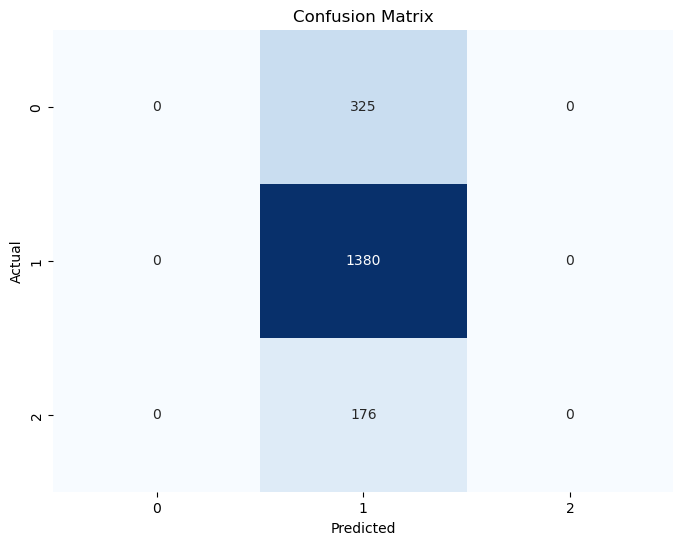

Accuracy: 0.7336522936820984
Classification Report:
               precision    recall  f1-score   support

         Bad       1.00      0.00      0.00       325
        Good       0.73      1.00      0.85      1380
    Moderate       1.00      0.00      0.00       176

    accuracy                           0.73      1881
   macro avg       0.91      0.33      0.28      1881
weighted avg       0.80      0.73      0.62      1881



In [4]:
reviews = data["processed_reviews"]
target = data["review_tag"]

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

num_classes = len(label_encoder.classes_)

X_train, X_test, y_train, y_test = train_test_split(reviews, target, test_size=0.2, random_state=42)

max_words = 10000  # Maximum number of words to consider
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 200  # Maximum length of a sequence
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

embedding_dim = 100  # Dimensionality of the word embeddings

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64
history = model.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

loss, accuracy = model.evaluate(X_test_padded, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

predictions = model.predict(X_test_padded)
predicted_labels = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_test, predicted_labels, target_names=label_encoder.classes_, zero_division=1)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)